<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
# Additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [4]:
# Number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [5]:
# Build th model using the functional API

i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 7ms/step - loss: 1.2933 - accuracy: 0.5512 - val_loss: 0.9619 - val_accuracy: 0.6592
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8318 - accuracy: 0.7116 - val_loss: 0.7678 - val_accuracy: 0.7369
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6798 - accuracy: 0.7661 - val_loss: 0.7834 - val_accuracy: 0.7344
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5753 - accuracy: 0.8043 - val_loss: 0.7719 - val_accuracy: 0.7539
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4841 - accuracy: 0.8336 - val_loss: 0.7126 - val_accuracy: 0.7655
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4102 - accuracy: 0.8569 - val_loss: 0.6619 - val_accuracy: 0.7959
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3531 - accuracy: 0.8776 - val_loss: 0.6397 - val_ac

In [9]:
# Fit with data augmentation

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1562/1562 [==============================] - 26s 17ms/step - loss: 0.5507 - accuracy: 0.8259 - val_loss: 0.5172 - val_accuracy: 0.8371
Epoch 2/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.4402 - accuracy: 0.8551 - val_loss: 0.4866 - val_accuracy: 0.8467
Epoch 3/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.4109 - accuracy: 0.8642 - val_loss: 0.4713 - val_accuracy: 0.8485
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3919 - accuracy: 0.8696 - val_loss: 0.5000 - val_accuracy: 0.8453
Epoch 5/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.3791 - accuracy: 0.8730 - val_loss: 0.4296 - val_accuracy: 0.8582
Epoch 6/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.3559 - accuracy: 0.8821 - val_loss: 0.4247 - val_accuracy: 0.8591
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3433 - accuracy: 0.8856 - val_loss: 0.4406 - val_accura

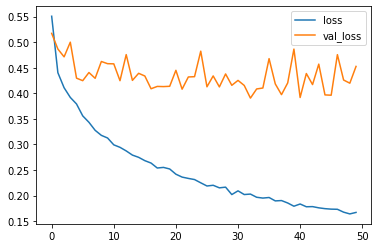

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

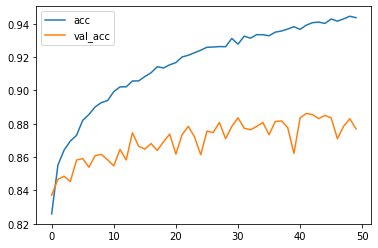

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[942   8  17   5   3   0   5   2  11   7]
 [  8 967   0   2   1   0   1   0   1  20]
 [ 29   2 865  28  28  13  22   6   2   5]
 [ 18   3  50 778  35  40  37  17  10  12]
 [ 14   2  50  25 857   9  21  21   1   0]
 [ 10   5  36 142  31 729  18  26   1   2]
 [  8   3  31  27   5   2 919   3   2   0]
 [ 16   1  18  23  19  10   4 905   1   3]
 [ 74  11   7   3   1   1   1   1 886  15]
 [ 18  41   2   6   1   0   2   2   7 921]]


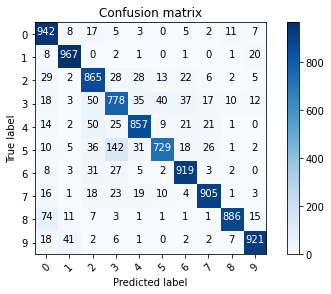

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting normalize=True 
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
# Labels mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frong
horse
ship
truck'''.split()

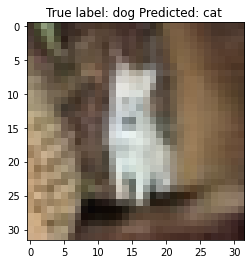

In [17]:
# Show some misclassified 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));